# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1.Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Cleaning Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [92]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Libraries for data preparation and model building
import scipy as sp
import statsmodels as sm
import sklearn.model_selection as skl
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split



# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [93]:
df = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Data Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [94]:
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


##### The column `Unnamed: 0` is dropped becaues it is an exact replica of the index column.

In [95]:
df = df.drop("Unnamed: 0", axis =1)

##### The dataset has `49 features` and `8763 observations`.

In [96]:
df.shape

(8763, 48)

##### There are `2068 null entries` in total in the entire dataset.

In [97]:
# Checks for total nulls in the dataframe
df.isnull().sum().sum()

2068

##### The function `check_nulls` tallies the number of nulls per column.

In [98]:
#  Checks for total per column
def check_nulls (data):
    null_dict = {}

    for col in df.columns:

        if df[col].size > df[col].count():
            nulls = df[col].size - df[col].count()
            percent_missing = round(nulls / df[col].size * 100)
            null_dict[col] = f'has {nulls} nulls making up {percent_missing}% missing values'
    return null_dict

##### Running `check_nulls` exposes that all null values are in one colunm. Namely, `valencia_pressure`.

In [99]:
check_nulls(df)

{'Valencia_pressure': 'has 2068 nulls making up 24% missing values'}

##### The column names are all cast to lower case for ease of referencing in the later phases.
##### The columns are set in alphabetical order so that the features are grouped by city.
##### The time feature is kept in the first index position.

In [100]:
# 1. Order the columns in alphabetical order
df = df.reindex(sorted(df.columns), axis=1)

# 2. Keep the "time" column in the first index position
df = df[['time'] + [col for col in df.columns if col != 'time']]

# 3. Keep the "load_shortfall_3h" column last
df = df[[col for col in df.columns if col != 'load_shortfall_3h'] + ['load_shortfall_3h']]

# 4. Convert all column titles to lowercase
df.columns = df.columns.str.lower()

df.head()

,time,barcelona_pressure,barcelona_rain_1h,barcelona_rain_3h,barcelona_temp,barcelona_temp_max,barcelona_temp_min,barcelona_weather_id,barcelona_wind_deg,barcelona_wind_speed,...,seville_wind_speed,valencia_humidity,valencia_pressure,valencia_snow_3h,valencia_temp,valencia_temp_max,valencia_temp_min,valencia_wind_deg,valencia_wind_speed,load_shortfall_3h
0,2015-01-01 03:00:00,1036.333333,0.0,0.0,281.013000,281.013000,281.013000,800.0,42.666667,6.333333,...,3.333333,75.666667,1002.666667,0.0,269.888000,269.888000,269.888000,level_5,0.666667,6715.666667
1,2015-01-01 06:00:00,1037.333333,0.0,0.0,280.561667,280.561667,280.561667,800.0,139.000000,4.000000,...,3.333333,71.000000,1004.333333,0.0,271.728333,271.728333,271.728333,level_10,1.666667,4171.666667
2,2015-01-01 09:00:00,1038.000000,0.0,0.0,281.583667,281.583667,281.583667,800.0,326.000000,2.000000,...,2.666667,65.666667,1005.333333,0.0,278.008667,278.008667,278.008667,level_9,1.000000,4274.666667
3,2015-01-01 12:00:00,1037.000000,0.0,0.0,283.434104,283.434104,283.434104,800.0,273.000000,2.333333,...,4.000000,54.000000,1009.000000,0.0,284.899552,284.899552,284.899552,level_8,1.000000,5075.666667
4,2015-01-01 15:00:00,1035.000000,0.0,0.0,284.213167,284.213167,284.213167,800.0,260.000000,4.333333,...,3.000000,58.333333,NaN,0.0,283.015115,283.015115,283.015115,level_7,1.000000,6620.666667


<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

##### The `load_shortfall_3h` column name is stored in a `target_variable`.

In [101]:
target_variable = 'load_shortfall_3h'

##### The function `get_categorical_cols` outputs a list of all the columns that are of `object` datatype.
##### Other than `time`, there are two others. `seville_pressue` and `valencia_wind_deg`.

In [102]:
# outputs dataframe of catagorical data
def get_categorical_cols(df):
    non_numeric = []
    for col in df.columns:
        if df[col].dtype == object:
          non_numeric.append(col)
    return df[non_numeric]

categorical_df = get_categorical_cols(df)
categorical_df.head()

,time,seville_pressure,valencia_wind_deg
0,2015-01-01 03:00:00,sp25,level_5
1,2015-01-01 06:00:00,sp25,level_10
2,2015-01-01 09:00:00,sp25,level_9
3,2015-01-01 12:00:00,sp25,level_8
4,2015-01-01 15:00:00,sp25,level_7


In [103]:
categorical_df.shape

(8763, 3)

##### The function `get_numeric_cols` outputs a list of all the columns that are of `float` or `int` datatype values.

In [104]:
def get_numeric_cols(df):
    non_numeric = []
    for col in df.columns:
        if df[col].dtype != object:
          non_numeric.append(col)
    return df[non_numeric]

numeric_df = get_numeric_cols(df)
numeric_df.head()

,barcelona_pressure,barcelona_rain_1h,barcelona_rain_3h,barcelona_temp,barcelona_temp_max,barcelona_temp_min,barcelona_weather_id,barcelona_wind_deg,barcelona_wind_speed,bilbao_clouds_all,...,seville_weather_id,seville_wind_speed,valencia_humidity,valencia_pressure,valencia_snow_3h,valencia_temp,valencia_temp_max,valencia_temp_min,valencia_wind_speed,load_shortfall_3h
0,1036.333333,0.0,0.0,281.013000,281.013000,281.013000,800.0,42.666667,6.333333,0.0,...,800.0,3.333333,75.666667,1002.666667,0.0,269.888000,269.888000,269.888000,0.666667,6715.666667
1,1037.333333,0.0,0.0,280.561667,280.561667,280.561667,800.0,139.000000,4.000000,0.0,...,800.0,3.333333,71.000000,1004.333333,0.0,271.728333,271.728333,271.728333,1.666667,4171.666667
2,1038.000000,0.0,0.0,281.583667,281.583667,281.583667,800.0,326.000000,2.000000,0.0,...,800.0,2.666667,65.666667,1005.333333,0.0,278.008667,278.008667,278.008667,1.000000,4274.666667
3,1037.000000,0.0,0.0,283.434104,283.434104,283.434104,800.0,273.000000,2.333333,0.0,...,800.0,4.000000,54.000000,1009.000000,0.0,284.899552,284.899552,284.899552,1.000000,5075.666667
4,1035.000000,0.0,0.0,284.213167,284.213167,284.213167,800.0,260.000000,4.333333,2.0,...,800.0,3.000000,58.333333,NaN,0.0,283.015115,283.015115,283.015115,1.000000,6620.666667


In [105]:
numeric_df.shape

(8763, 45)

##### The kurtosis of all columns is checked to figure out which columns possibly contain outliers. 

In [106]:
kurtosis_values = df.kurtosis(numeric_only=True)
outlier_columns = kurtosis_values[kurtosis_values > 3].index
outlier_columns

# columns with potential outliers 
# to be normalisation later on

Index(['barcelona_pressure', 'barcelona_rain_1h', 'barcelona_rain_3h',
       'barcelona_weather_id', 'bilbao_rain_1h', 'bilbao_snow_3h',
       'bilbao_wind_speed', 'madrid_rain_1h', 'madrid_weather_id',
       'seville_rain_1h', 'seville_rain_3h', 'seville_weather_id',
       'valencia_snow_3h', 'valencia_wind_speed'],
      dtype='object')

##### Using a for loop a list containing the names of the cites is extracted. 

In [107]:
# list of unique city names 
unique_cities = []
for col in df.drop(['time', 'load_shortfall_3h'], axis=1).columns:
    city = col.split('_')[0]
    if city not in unique_cities:
        unique_cities.append(city)

unique_cities

['barcelona', 'bilbao', 'madrid', 'seville', 'valencia']

##### Using `city_df` a unique dataset for all cities is created. This step is mostly for convenience so that more manageable correlation heatmaps can be created later on.

In [108]:
# returns a dataframe with weather data for each ciy
def city_df (df, city_name):

    cities = {}

    for col in df.columns:
        city = col.split('_')[0]

        if city not in cities:
            cities[city] = []

            for col in df.columns:
                if city in col:
                    cities[city].append(col)
    
    cities[city_name].append(target_variable)
    
    return df[cities[city_name]]

### Number Summaries

##### The number summaries for the numeric columns reveal an interesting characteristic about all the features related to rain. The columns are mostly filled with `0` entries and have very low varience in their values. These columns are primary candidates for removal during Data Enginnering.

In [109]:
# description of the barcelona weather values
barcelona_df = city_df(df, unique_cities[0])
barcelona_df.describe()

,barcelona_pressure,barcelona_rain_1h,barcelona_rain_3h,barcelona_temp,barcelona_temp_max,barcelona_temp_min,barcelona_weather_id,barcelona_wind_deg,barcelona_wind_speed,load_shortfall_3h
count,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,1.377965e+03,0.128906,0.000439,289.855459,291.157644,288.447422,765.979687,190.544848,2.870497,10673.857612
std,1.407314e+04,0.634730,0.003994,6.528111,7.273538,6.102593,88.142235,89.077337,1.792197,5218.046404
min,6.706667e+02,0.000000,0.000000,270.816667,272.150000,269.483333,200.666667,0.000000,0.000000,-6618.000000
25%,1.014000e+03,0.000000,0.000000,284.973443,285.483333,284.150000,800.000000,118.166667,1.666667,7390.333333
50%,1.018000e+03,0.000000,0.000000,289.416667,290.150000,288.150000,800.333333,200.000000,2.666667,11114.666667
75%,1.022000e+03,0.000000,0.000000,294.909000,296.855000,292.966667,801.000000,260.000000,4.000000,14498.166667
max,1.001411e+06,12.000000,0.093000,307.316667,314.076667,304.816667,804.000000,360.000000,12.666667,31904.000000


In [110]:
# description of the barcelona weather values
bilbao_df = city_df(df, unique_cities[1])
bilbao_df.describe()

,bilbao_clouds_all,bilbao_pressure,bilbao_rain_1h,bilbao_snow_3h,bilbao_temp,bilbao_temp_max,bilbao_temp_min,bilbao_weather_id,bilbao_wind_deg,bilbao_wind_speed,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,43.469132,1017.739549,0.135753,0.031912,286.422929,287.966027,285.017973,724.722362,158.957511,1.850356,10673.857612
std,32.551044,10.046124,0.374901,0.557264,6.818682,7.105590,6.705672,115.846537,102.056299,1.695888,5218.046404
min,0.000000,971.333333,0.000000,0.000000,267.483333,269.063000,264.483333,207.333333,0.000000,0.000000,-6618.000000
25%,10.000000,1013.000000,0.000000,0.000000,281.374167,282.836776,280.085167,700.333333,73.333333,0.666667,7390.333333
50%,45.000000,1019.000000,0.000000,0.000000,286.158333,287.630000,284.816667,800.000000,147.000000,1.000000,11114.666667
75%,75.000000,1024.000000,0.100000,0.000000,291.034167,292.483333,289.816667,801.666667,234.000000,2.666667,14498.166667
max,100.000000,1042.000000,3.000000,21.300000,310.710000,317.966667,309.816667,804.000000,359.333333,12.666667,31904.000000


In [111]:
# description of the madrid weather values
madrid_df = city_df(df, unique_cities[2])
madrid_df.describe()

,madrid_clouds_all,madrid_humidity,madrid_pressure,madrid_rain_1h,madrid_temp,madrid_temp_max,madrid_temp_min,madrid_weather_id,madrid_wind_speed,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,19.473392,57.414717,1010.316920,0.037818,288.419439,289.540309,287.202203,773.527594,2.425729,10673.857612
std,28.053660,24.335396,22.198555,0.152639,9.346796,9.752047,9.206237,77.313315,1.850371,5218.046404
min,0.000000,6.333333,927.666667,0.000000,264.983333,264.983333,264.983333,211.000000,0.000000,-6618.000000
25%,0.000000,36.333333,1012.333333,0.000000,281.404281,282.150000,280.299167,800.000000,1.000000,7390.333333
50%,0.000000,58.000000,1017.333333,0.000000,287.053333,288.116177,286.083333,800.000000,2.000000,11114.666667
75%,33.333333,78.666667,1022.000000,0.000000,295.154667,296.816667,293.884500,800.666667,3.333333,14498.166667
max,100.000000,100.000000,1038.000000,3.000000,313.133333,314.483333,310.383333,804.000000,13.000000,31904.000000


In [112]:
# description of the seville weather values
seville_df = city_df(df, unique_cities[3])
seville_df.describe()

,seville_clouds_all,seville_humidity,seville_rain_1h,seville_rain_3h,seville_temp,seville_temp_max,seville_temp_min,seville_weather_id,seville_wind_speed,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,13.714748,62.658793,0.039439,0.000243,293.978903,297.479527,291.633356,774.658818,2.425045,10673.857612
std,24.272482,22.621226,0.175857,0.003660,7.920986,8.875812,8.178220,71.940009,1.672895,5218.046404
min,0.000000,8.333333,0.000000,0.000000,272.063000,272.063000,270.150000,200.000000,0.000000,-6618.000000
25%,0.000000,44.333333,0.000000,0.000000,288.282917,291.312750,285.816667,800.000000,1.000000,7390.333333
50%,0.000000,65.666667,0.000000,0.000000,293.323333,297.101667,290.816667,800.000000,2.000000,11114.666667
75%,20.000000,82.000000,0.000000,0.000000,299.620333,304.150000,297.150000,800.000000,3.333333,14498.166667
max,97.333333,100.000000,3.000000,0.093333,314.976667,320.483333,314.816667,804.000000,11.666667,31904.000000


In [113]:
# description of the seville weather values
valencia_df = city_df(df, unique_cities[4])
valencia_df.describe()

,valencia_humidity,valencia_pressure,valencia_snow_3h,valencia_temp,valencia_temp_max,valencia_temp_min,valencia_wind_speed,load_shortfall_3h
count,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,65.247727,1012.051407,0.000205,290.592152,291.337233,289.867648,2.586272,10673.857612
std,19.262322,9.506214,0.011866,7.162274,7.565692,6.907402,2.411190,5218.046404
min,10.333333,972.666667,0.000000,269.888000,269.888000,269.888000,0.000000,-6618.000000
25%,51.333333,1010.333333,0.000000,285.150000,285.550167,284.783333,1.000000,7390.333333
50%,67.000000,1015.000000,0.000000,290.176667,291.037000,289.550000,1.666667,11114.666667
75%,81.333333,1018.000000,0.000000,296.056667,297.248333,294.820000,3.666667,14498.166667
max,100.000000,1021.666667,0.791667,310.426667,314.263333,310.272000,52.000000,31904.000000


##### A scatterplot of all the numeric features were plotted against the target feature `load_shortfall`. There were no obvious trends discernible and no feature stands out as either strongly or negatively correlated to the target.  

In [114]:
# plot relevant feature interactions
index = 0
fig, axs = plt.subplots(15, 3, figsize=(15, 30))
for i in range(15):
    for j in range(3):
        var = numeric_df.columns[index]
        sns.scatterplot(data=numeric_df, x=var, y=target_variable, ax=axs[i,j])
        axs[i,j].set_title(f'{var} vs. {target_variable}')
    index += 1    
fig.tight_layout()
plt.show()

In [ ]:
categorical_df.shape

(8763, 3)

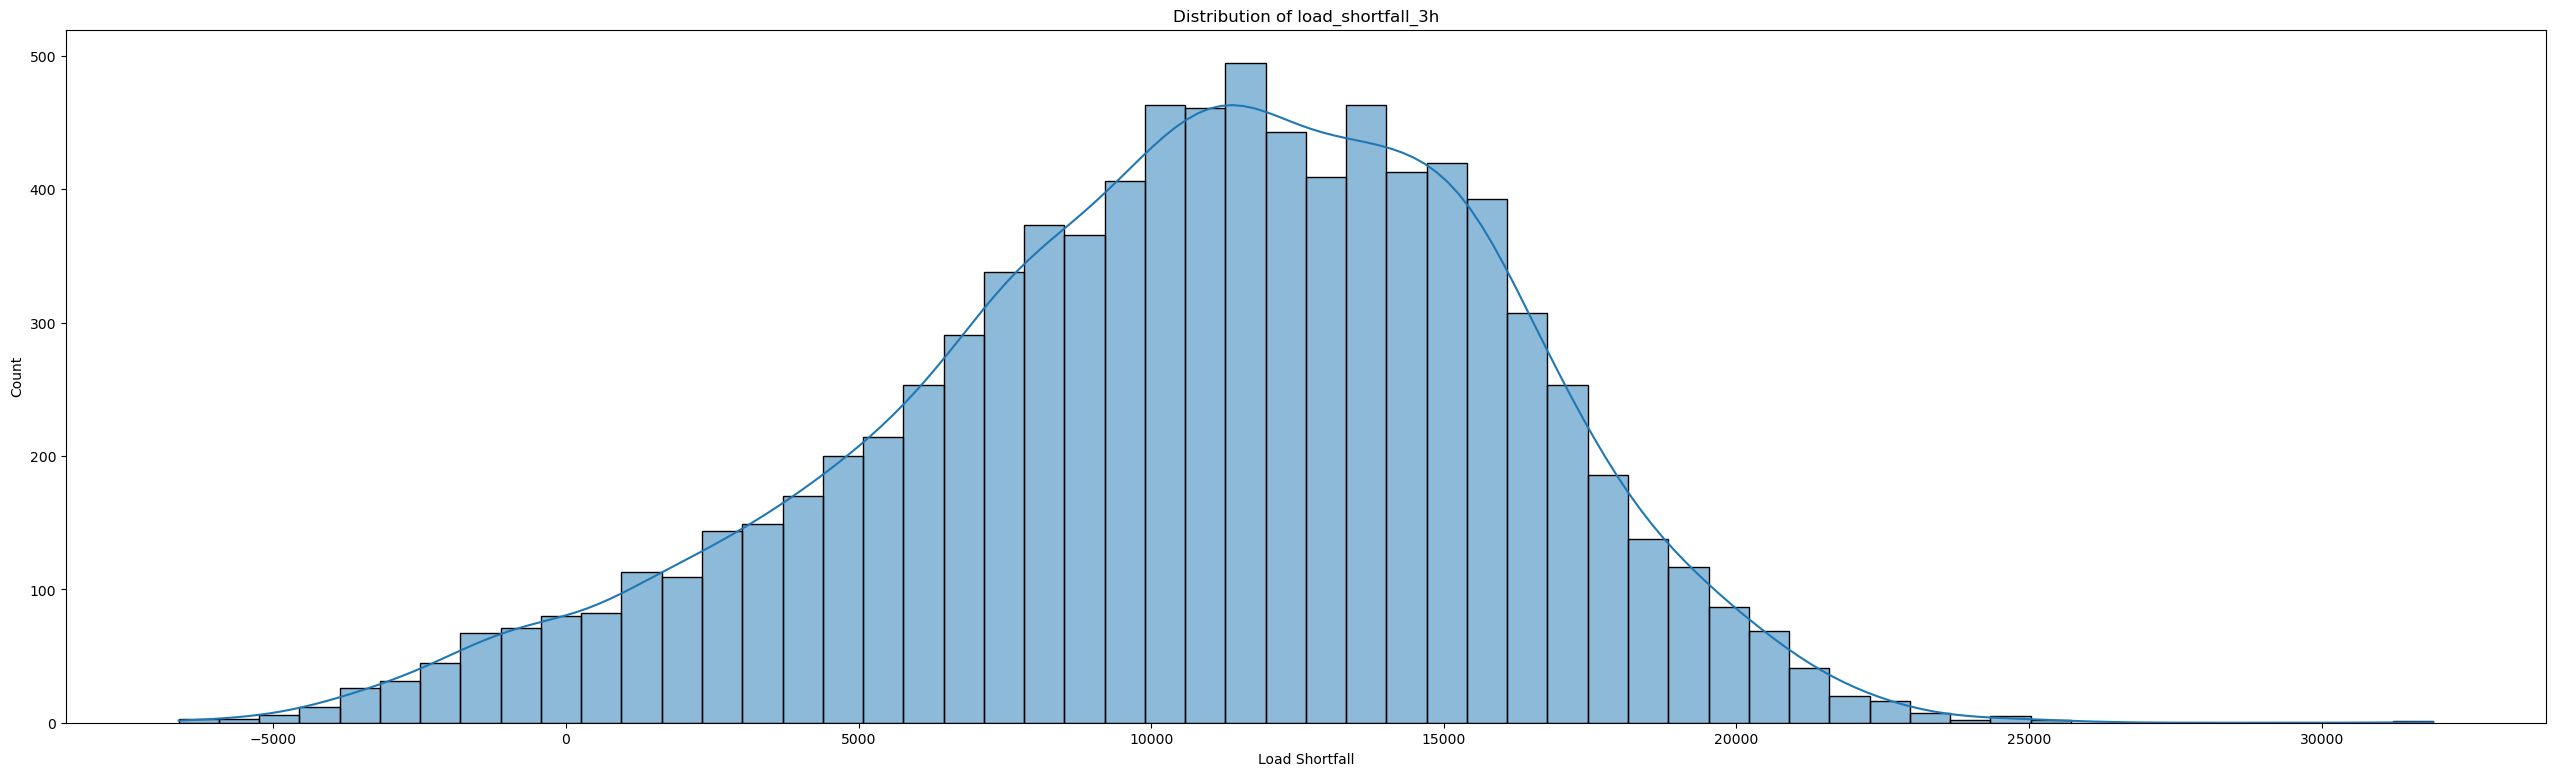

In [ ]:
# have a look at feature distributions
plt.figure(figsize =(32,9))
sns.histplot(df['load_shortfall_3h'], kde=True)
plt.xlabel('Load Shortfall')
plt.ylabel('Count')
plt.title('Distribution of load_shortfall_3h')
plt.show()

##### We used boxplot visuals to check for possible trends in the non-catagorical data. Nothing significant pops up for any one catagory. Their median values are rougly equivalent and so are their ranges. Although a there is significant enough visible variation in the interquatile ranges for the shortfall amount that this feature can be retained for inclusion in the model.

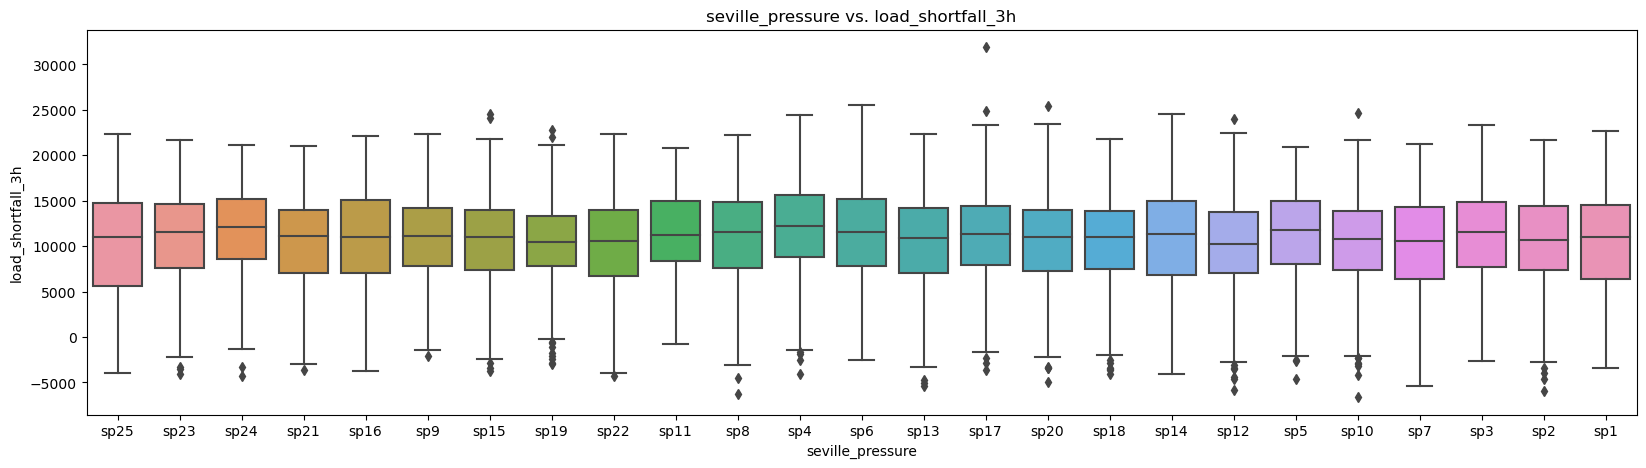

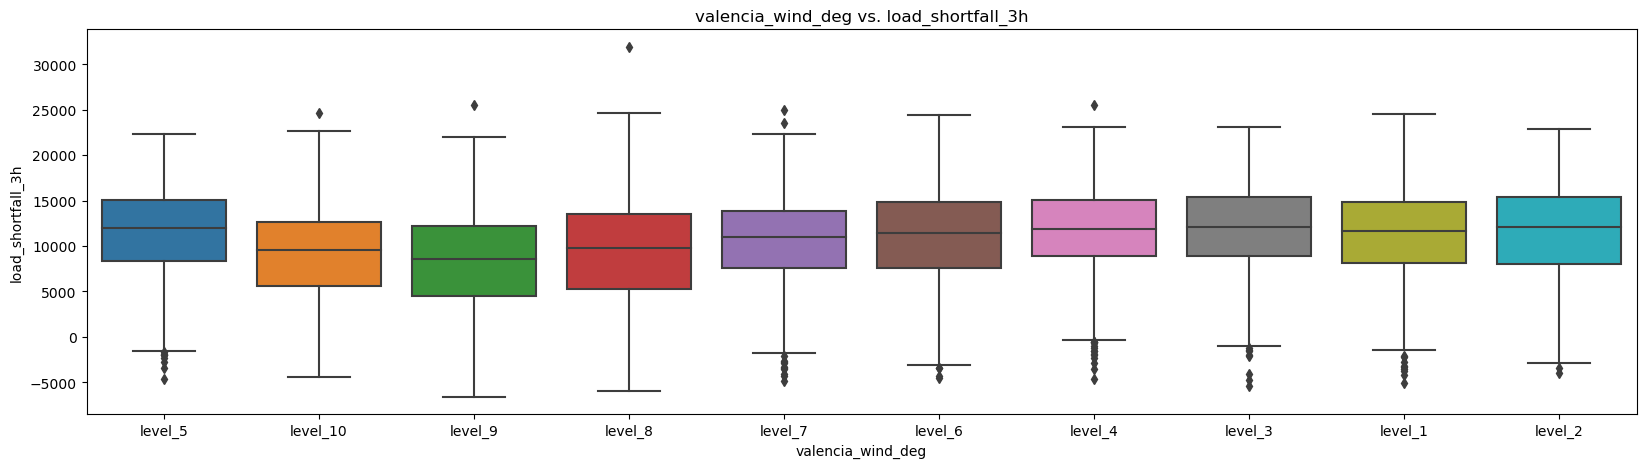

In [ ]:
for var in categorical_df.drop("time", axis=1).columns:
     plt.figure(figsize =(20,5))
     sns.boxplot(x=var, y=target_variable, data = df)
     plt.title(f'{var} vs. {target_variable}')
     plt.show()

##### To further explore relationships between features, we plotted correlation heatmaps for each city separately. We observed that although all the features fall within the rrange of weak to no correlation at all, temperature features overall seem to have the strongest relationship with load shortfall, followed by wind degree, which not surprisingly, has a negative correlation (althought still very weak) with the target variable. 

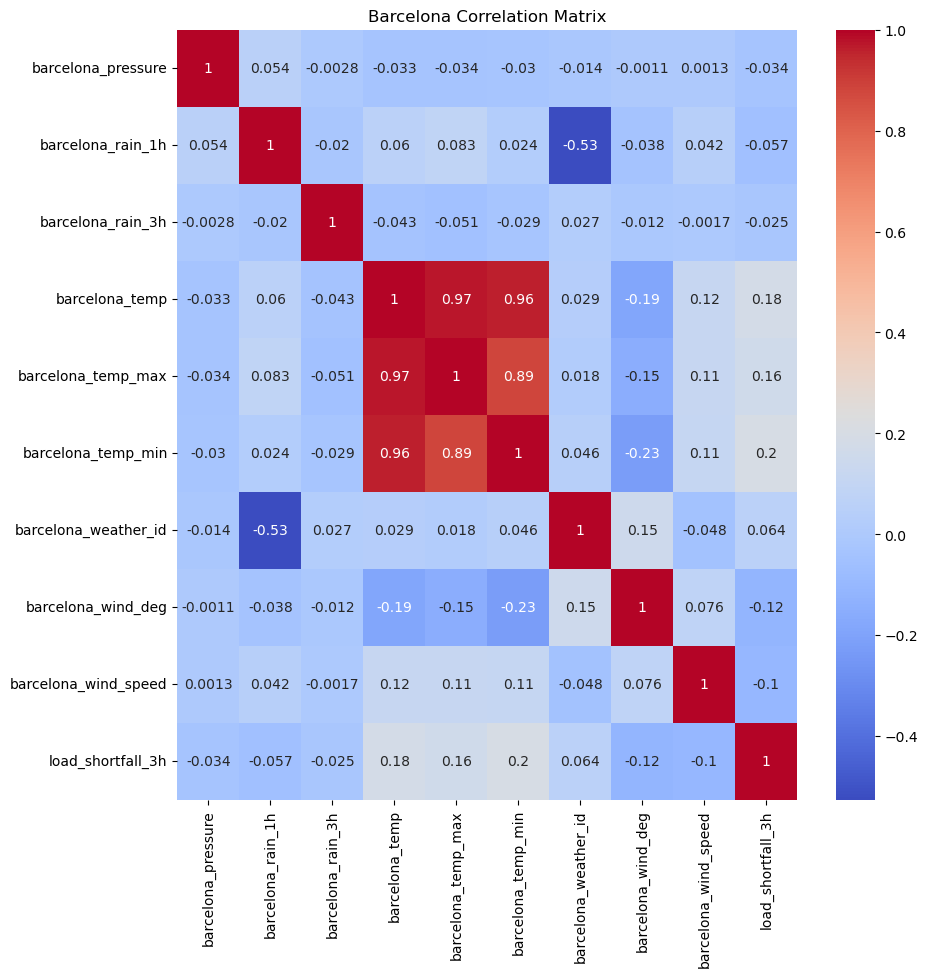

In [ ]:
# Select variables for correlation matrix
barca_corr_matrix = barcelona_df.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize =(10,10))
sns.heatmap(barca_corr_matrix, annot=True, cmap='coolwarm', xticklabels=True, yticklabels=True)
plt.title('Barcelona Correlation Matrix')
plt.show()

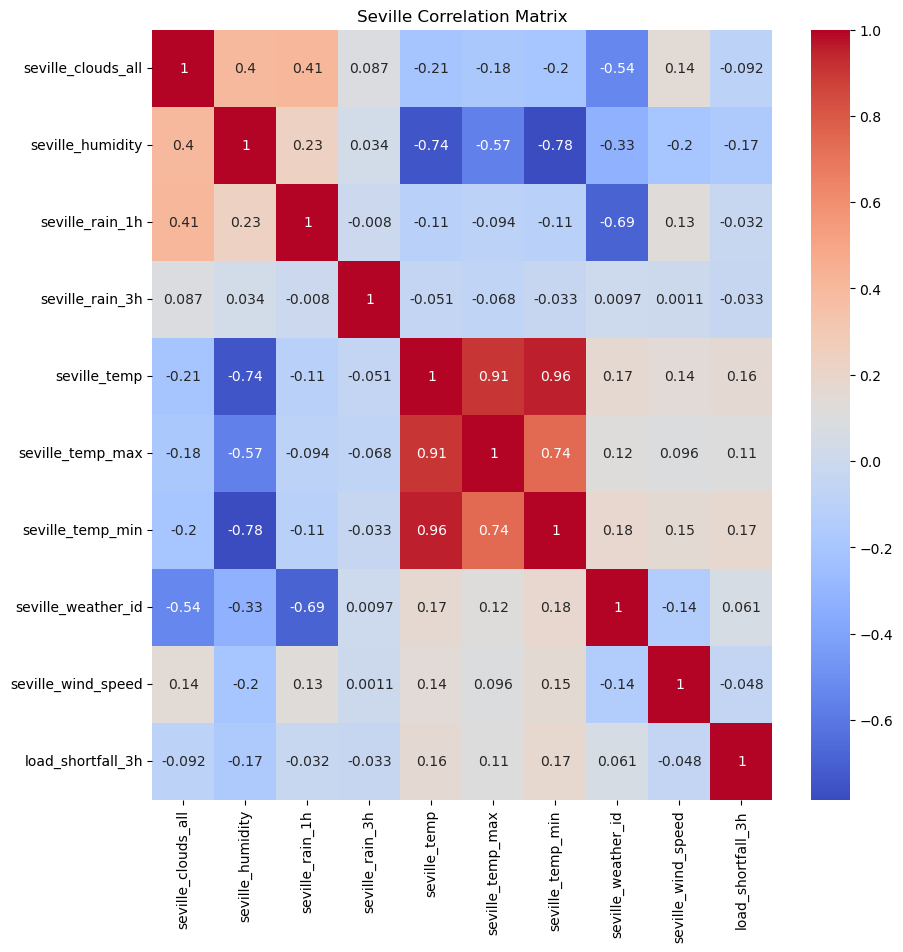

In [ ]:
# Select variables for correlation matrix
sevi_corr_matrix = seville_df.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize =(10,10))
sns.heatmap(sevi_corr_matrix, annot=True, cmap='coolwarm', xticklabels=True, yticklabels=True)
plt.title('Seville Correlation Matrix')
plt.show()

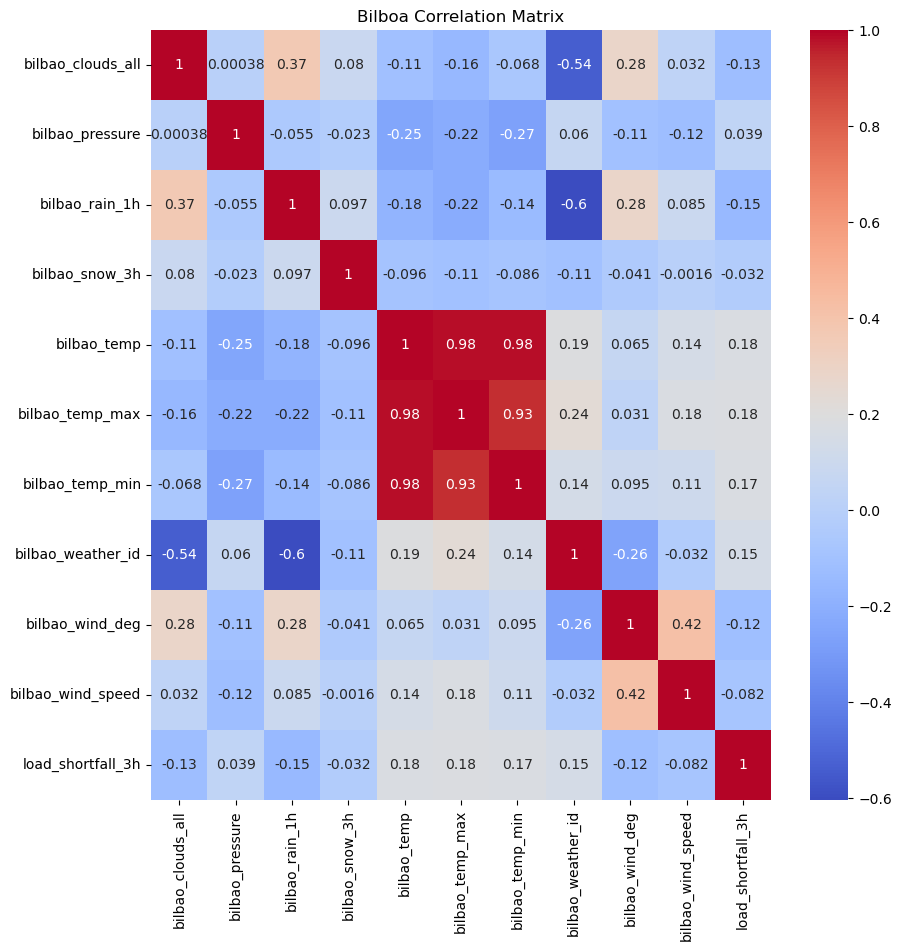

In [ ]:
# Select variables for correlation matrix
bilb_corr_matrix = bilbao_df.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize =(10,10))
sns.heatmap(bilb_corr_matrix, annot=True, cmap='coolwarm', xticklabels=True, yticklabels=True)
plt.title('Bilboa Correlation Matrix')
plt.show()


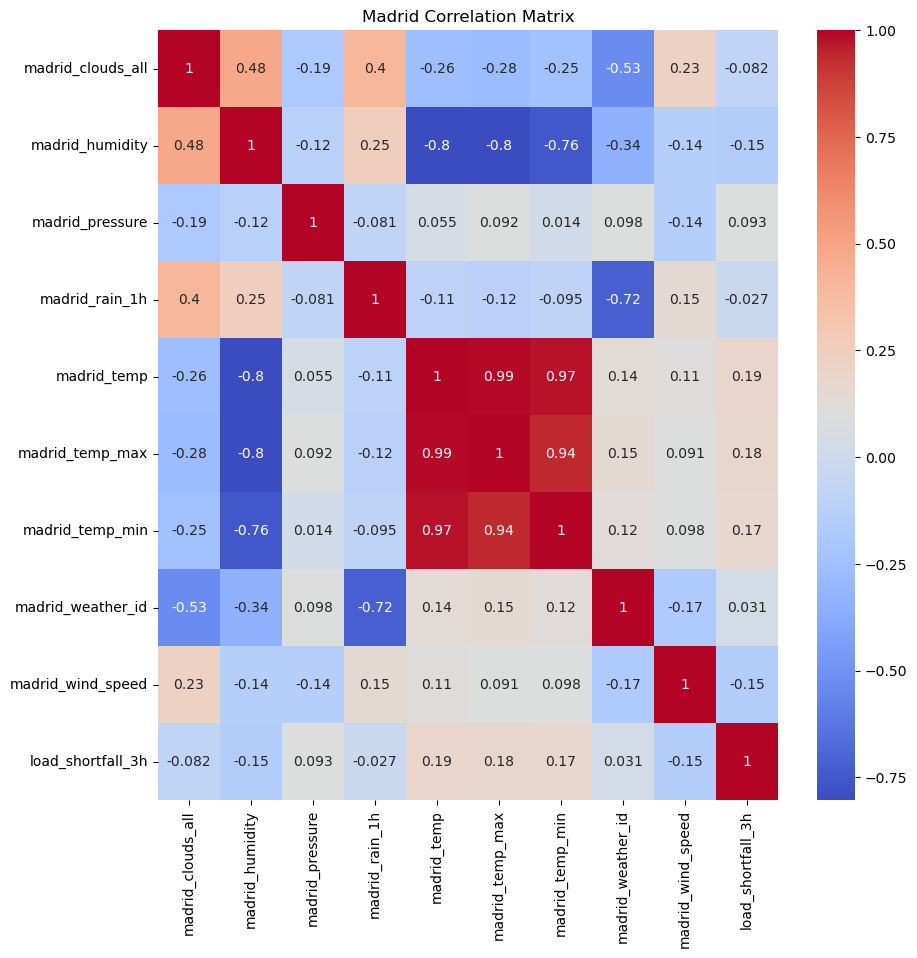

In [ ]:
# Select variables for correlation matrix
madr_corr_matrix = madrid_df.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize =(10,10))
sns.heatmap(madr_corr_matrix, annot=True, cmap='coolwarm', xticklabels=True, yticklabels=True)
plt.title('Madrid Correlation Matrix')
plt.show()

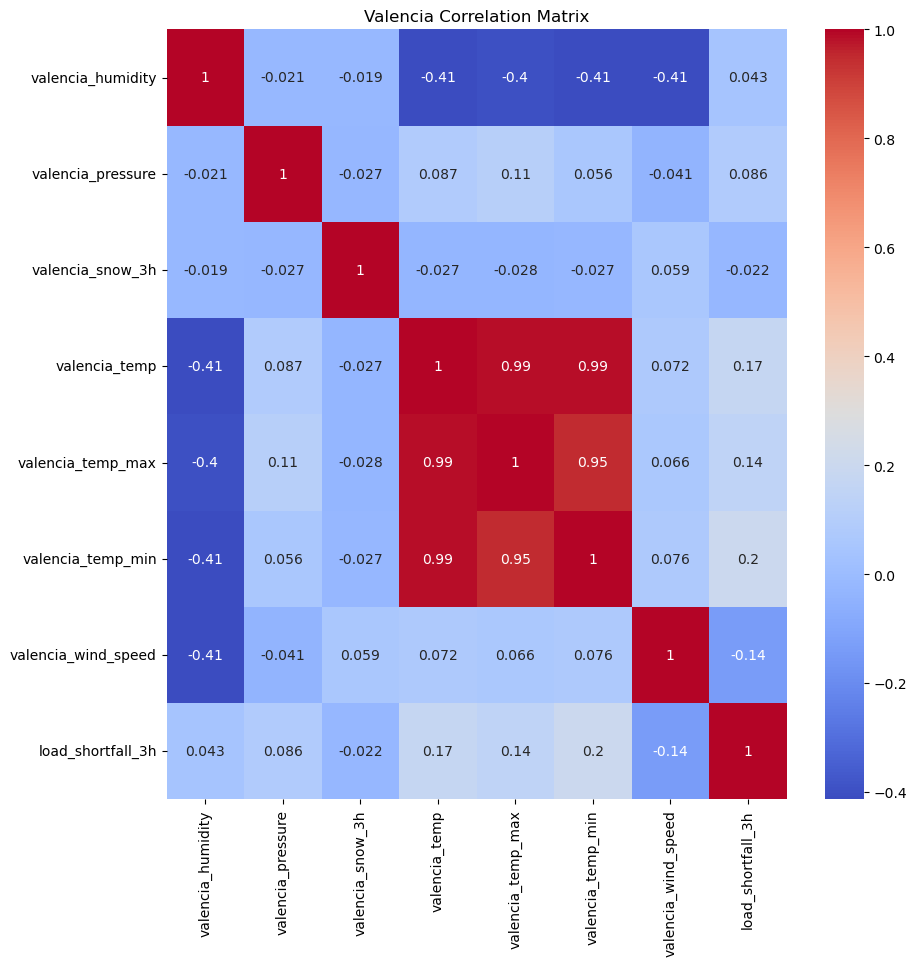

In [ ]:
# Select variables for correlation matrix
vale_corr_matrix = valencia_df.corr(numeric_only=True) 

# Plot the correlation matrix as a heatmap
plt.figure(figsize =(10,10))
sns.heatmap(vale_corr_matrix, annot=True, cmap='coolwarm', xticklabels=True, yticklabels=True)
plt.title('Valencia Correlation Matrix')
plt.show()

##### Lastly we took a look at how the shortfall changes over time. It revealed and interesting pattern that looks like it has fluctuations that are seasonal as well as nested cycles that occured at a higher frequency than the broader overall cycle. 

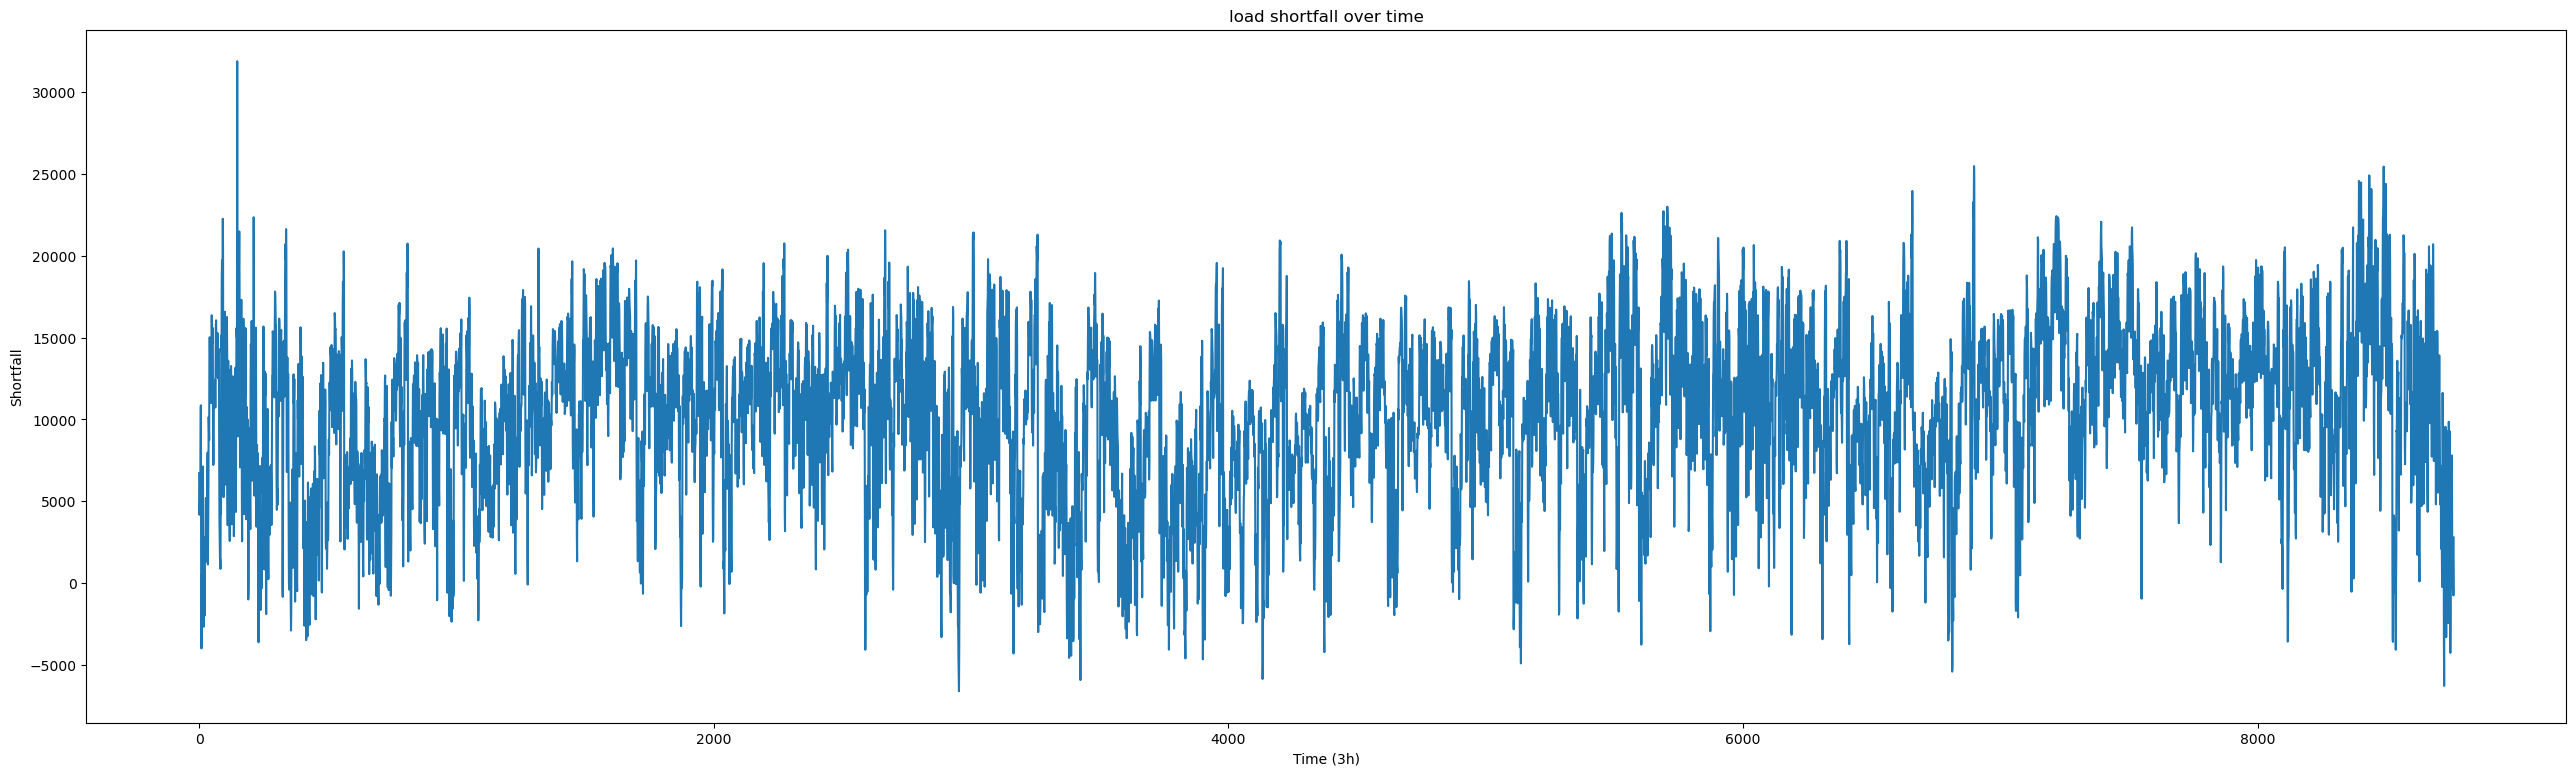

In [ ]:
plt.figure(figsize =(32,9))
plt.plot(np.arange(len(df[target_variable])), df[target_variable])
plt.title("load shortfall over time")
plt.xlabel("Time (3h)")
plt.ylabel("Shortfall")
plt.show()

##### To get clearer analysis on possible time related patterns in shortfall we created frequency tables to aggregate averages for daily and annual cycles. 

In [ ]:
hour_freqs = {}
for index, row in df.iterrows():
    hour = row["time"][11:]
    if hour in hour_freqs:
        hour_freqs[hour][0] += row[target_variable]
        hour_freqs[hour][1] += 1
    else:
        hour_freqs[hour] = [row[target_variable], 1]

##### The bar chart shows a very high average shortfall between 12am midday and 3pm and again 12 midnight and 3am for the day cycles. 

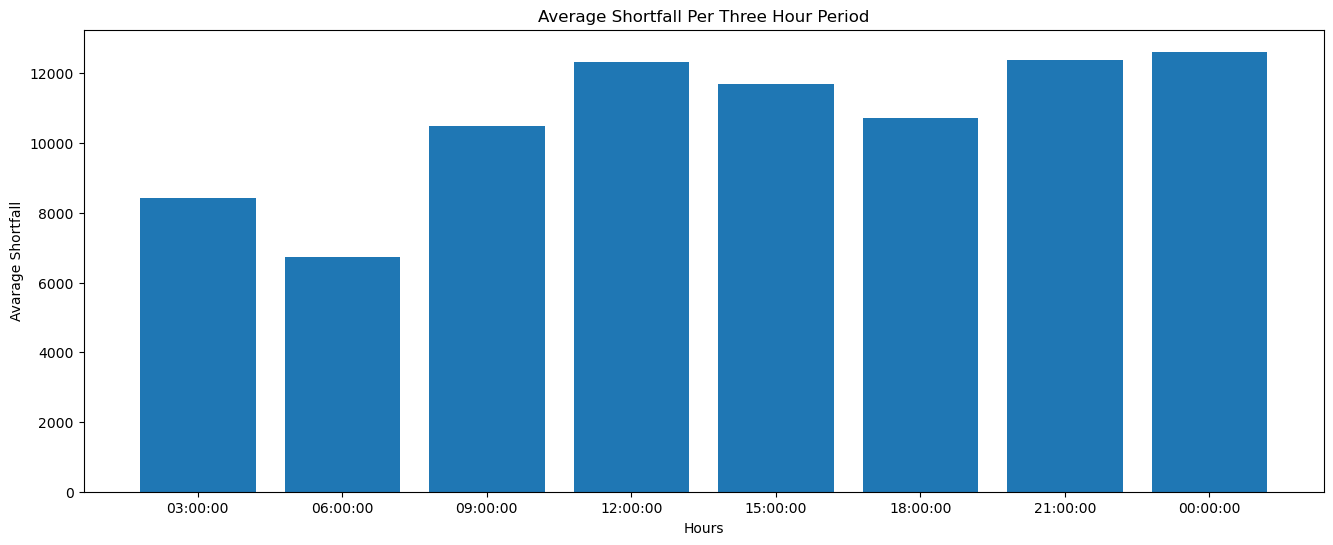

In [ ]:
# Extract x-values (hours) and y-values (quotients)
hr_x_values = list(hour_freqs.keys())
hr_y_values = [value[0] / value[1] for value in hour_freqs.values()]

# Plot the histogram
plt.figure(figsize=(16, 6))
plt.bar(hr_x_values, hr_y_values)
plt.xlabel('Hours')
plt.ylabel('Avarage Shortfall')
plt.title('Average Shortfall Per Three Hour Period')
plt.show()

##### Below is a frequency table created to check for patterns in the annual cycles. 

In [ ]:
mon_freqs = {}
for index, row in df.iterrows():
    mon = row["time"][5:7]
    if mon in mon_freqs:
        mon_freqs[mon][0] += row[target_variable]
        mon_freqs[mon][1] += 1
    else:
        mon_freqs[mon] = [row[target_variable], 1]

##### The bar chart confirms the initial observartion of a cycle within cycles of peaks and reduction in shortfall. There seems to be on average a higher shortfall between July and November and a lower avaerage shortfall between January and May. 

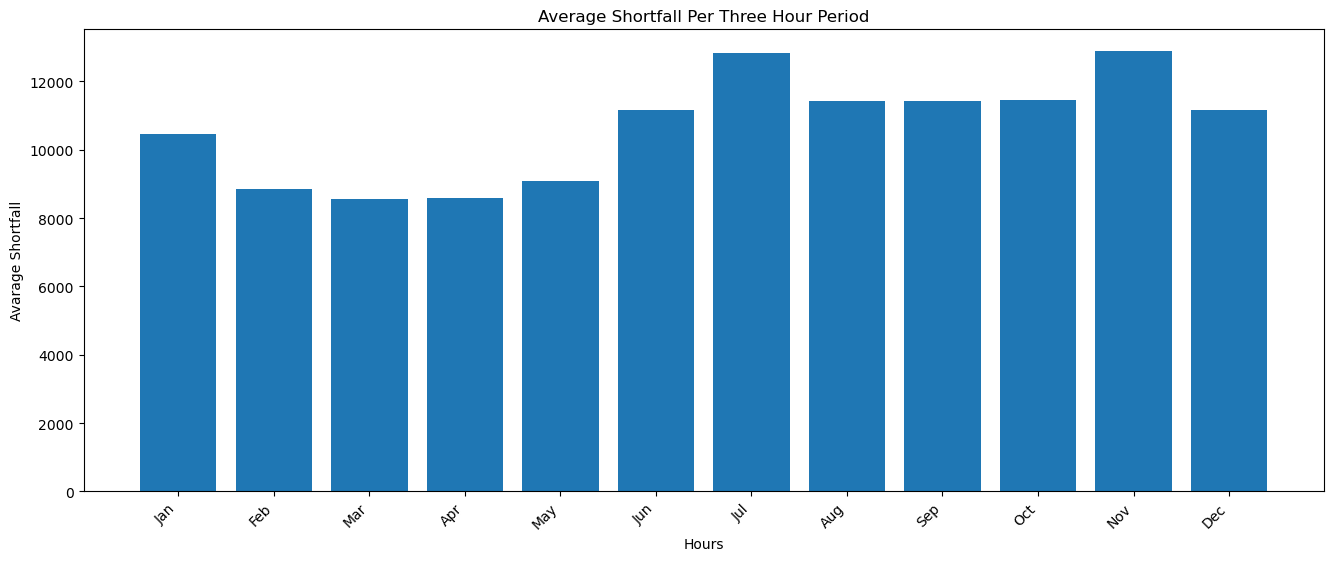

In [ ]:
# Extract x-values (hours) and y-values (quotients)
mn_x_values = list(mon_freqs.keys())
mn_y_values = [value[0] / value[1] for value in mon_freqs.values()]

mon_list = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
# Customize the x-labels


# Plot the histogram
plt.figure(figsize=(16, 6))
plt.bar(mn_x_values, mn_y_values)
plt.xlabel('Hours')
plt.ylabel('Avarage Shortfall')
plt.title('Average Shortfall Per Three Hour Period')
plt.xticks(ticks=np.arange(12), labels=mon_list, rotation=45, ha='right', fontsize=10)
plt.show()

<a id="five"></a>
## 5. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Section Goals
##### - Impute null values for the `seville_pressue feature`
##### - Remove `rain` and `snow` related columns.
##### - Minimize noise by selecting the relevant `temperature` related columns for each city.
##### - Convert  the `categorical` columns to `numerical` columns. 
##### - `Norrmalize` all the selected features to prepare them for model training. 

Engineering the train dataframe

In [ ]:
df_clean_train = df

Remove missing values and change the data types objects to numeric

In [ ]:
print('Mode')
print (df_clean_train['valencia_pressure'].mode())
print('Mean')
print(df_clean_train['valencia_pressure'].mean())
print('Median')
print(df_clean_train['valencia_pressure'].median())

Mode
0    1018.0
Name: valencia_pressure, dtype: float64
Mean
1012.0514065222798
Median
1015.0


In [ ]:
#Replace missing values in valencia pressure with the median
median_valencia_pressure = df_clean_train['valencia_pressure'].median()
df_clean_train['valencia_pressure'] = df_clean_train['valencia_pressure'].fillna(median_valencia_pressure)

In [ ]:
#Checking if the missing values still exists in valencia pressure
df_clean_train['valencia_pressure'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8763 entries, 0 to 8762
Series name: valencia_pressure
Non-Null Count  Dtype  
--------------  -----  
8763 non-null   float64
dtypes: float64(1)
memory usage: 68.6 KB


In [ ]:
#remove the strings from the 'valencia_wind_degree' to only consist of numbers
df_clean_train['valencia_wind_deg']= df_clean_train['valencia_wind_deg'].str.extract('(\d+)')

In [ ]:
#change the data type object to numeric
df_clean_train['valencia_wind_deg'] = pd.to_numeric(df_clean_train['valencia_wind_deg'])

In [ ]:
#remove the strings from the 'seville_pressure' to only consist of numbers
df_clean_train['seville_pressure']= df_clean_train['seville_pressure'].str.extract('(\d+)')

In [ ]:
#change the data type object to numeric
df_clean_train['seville_pressure'] = pd.to_numeric(df_clean_train['seville_pressure'])

In [ ]:
#changing the 'time' data type to datetime
df_clean_train['time'] = pd.to_datetime(df_clean_train['time'])

In [ ]:
#Extracting relevant features from the 'time' variable and creating new features
df_clean_train['year'] = df_clean_train['time'].dt.year
df_clean_train['month'] = df_clean_train['time'].dt.month
df_clean_train['day'] = df_clean_train['time'].dt.day
df_clean_train['hour'] = df_clean_train['time'].dt.hour
df_clean_train['minute'] = df_clean_train['time'].dt.minute
df_clean_train['second'] = df_clean_train['time'].dt.second

In [ ]:
df_clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   barcelona_pressure    8763 non-null   float64       
 2   barcelona_rain_1h     8763 non-null   float64       
 3   barcelona_rain_3h     8763 non-null   float64       
 4   barcelona_temp        8763 non-null   float64       
 5   barcelona_temp_max    8763 non-null   float64       
 6   barcelona_temp_min    8763 non-null   float64       
 7   barcelona_weather_id  8763 non-null   float64       
 8   barcelona_wind_deg    8763 non-null   float64       
 9   barcelona_wind_speed  8763 non-null   float64       
 10  bilbao_clouds_all     8763 non-null   float64       
 11  bilbao_pressure       8763 non-null   float64       
 12  bilbao_rain_1h        8763 non-null   float64       
 13  bilbao_snow_3h    

Only time variable has a data type that is not numeric, therefore it will be dropped as we have already extracted relevant features from it.

In [ ]:
df_clean_train = df_clean_train.drop(['time'], axis=1)

Perform the same engineering processes in the test dataset

In [ ]:
df_clean_test = df_test

In [ ]:
# 1. Order the columns in alphabetical order
df_clean_test = df_clean_test.reindex(sorted(df_clean_test.columns), axis=1)

# 2. Keep the "time" column in the first index position
df_clean_test = df_clean_test[['time'] + [col for col in df_clean_test.columns if col != 'time']]


# 3. Convert all column titles to lowercase
df_clean_test.columns = df_clean_test.columns.str.lower()

In [ ]:
#Replace missing values in valencia pressure with the median
median_valencia_pressure = df_clean_train['valencia_pressure'].median()
df_clean_test['valencia_pressure'] = df_clean_test['valencia_pressure'].fillna(median_valencia_pressure)

In [ ]:
#Checking if the missing values still exists in valencia pressure
df_clean_test['valencia_pressure'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2920 entries, 0 to 2919
Series name: valencia_pressure
Non-Null Count  Dtype  
--------------  -----  
2920 non-null   float64
dtypes: float64(1)
memory usage: 22.9 KB


In [ ]:
#remove the strings from the 'valencia_wind_degree' to only consist of numbers
df_clean_test['valencia_wind_deg']= df_clean_test['valencia_wind_deg'].str.extract('(\d+)')

In [ ]:
#change the data type object to numeric
df_clean_test['valencia_wind_deg'] = pd.to_numeric(df_clean_test['valencia_wind_deg'])

In [ ]:
#remove the strings from the 'seville_pressure' to only consist of numbers
df_clean_test['seville_pressure']= df_clean_test['seville_pressure'].str.extract('(\d+)')

In [ ]:
#change the data type object to numeric
df_clean_test['seville_pressure'] = pd.to_numeric(df_clean_test['seville_pressure'])

In [ ]:
#changing the 'time' data type to datetime
df_clean_test['time'] = pd.to_datetime(df_clean_test['time'])

In [ ]:
#Extracting relevant features from the 'time' variable and creating new features
df_clean_test['year'] = df_clean_test['time'].dt.year
df_clean_test['month'] = df_clean_test['time'].dt.month
df_clean_test['day'] = df_clean_test['time'].dt.day
df_clean_test['hour'] = df_clean_test['time'].dt.hour
df_clean_test['minute'] = df_clean_test['time'].dt.minute
df_clean_test['second'] = df_clean_test['time'].dt.second

In [ ]:
df_clean_test = df_clean_test.drop(['time'], axis=1)

In [ ]:
df_clean_test = df_clean_test.drop(['unnamed: 0'], axis=1)

In [ ]:
df_clean_test.columns

<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
#Separate the feature variables (X) and the target variable (y) in the train dataset
y = df_clean_train[:len(df)][['load_shortfall_3h']]
x = df_clean_train[:len(df)].drop('load_shortfall_3h' ,axis=1)

In [ ]:
# Splitting the train dataset into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# X_train: Independent variables for training
# X_val: Independent variables for validation
# y_train: Target variable for training
# y_val: Target variable for validation

Creating different models

In [ ]:
#create a linear regression model
lr = LinearRegression()

In [ ]:
#Create an instance of the Ridge regression model. You can specify the regularization strength (alpha) as a parameter. Higher alpha values will result in stronger regularization.
#Create a ridge model
ridge = Ridge(alpha=1.0)

In [ ]:
# Create a Random Forest model with a specific random state
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Create a Decision Tree model
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=2)

Fit the above created models

In [ ]:
# Fit the linear regression model to the training data
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Fit the ridge model to the training data
ridge.fit(x_train, y_train)

Ridge()

In [ ]:
# Fit the random forest model to the training data
rf.fit(x_train, y_train.values.ravel())

RandomForestRegressor(random_state=42)

In [ ]:
# Fit the decision tree model to the training data
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

Make predictions on the Validation set

In [ ]:
#Linear regression
y_pred_val_lr = lr.predict(x_val)

In [ ]:
#Ridge regression
y_pred_val_rd = ridge.predict(x_val)

In [ ]:
#Random Forest
y_pred_val_rf = rf.predict(x_val)

In [ ]:
#Decision Tree
y_pred_val_dt = dt.predict(x_val)

<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

Check each model's performance using RMSE and R-squared (R^2)

MODEL PERFOMANCE OF EACH MODEL ON THE VALIDATION SET

In [ ]:
def rmse(y_val, y_predict):
    return np.sqrt(mean_squared_error(y_val, y_predict))

In [ ]:
# Calculate the RMSE on the validation set
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val_lr))
print("Validation Set RMSE Linear regression(LR):", rmse)

# Calculate the RMSE on the validation set
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val_rd))
print("Validation Set RMSE Linear regression (RD):", rmse)

# Calculate the RMSE on the validation set
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val_rf))
print("Validation Set RMSE Linear regression(RF):", rmse)

# Calculate the RMSE on the validation set
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val_dt))
print("Validation Set RMSE Linear regression(DT):", rmse)

Validation Set RMSE Linear regression(LR): 4814.926871475219
Validation Set RMSE Linear regression (RD): 4816.152637229537
Validation Set RMSE Linear regression(RF): 3222.151082822388
Validation Set RMSE Linear regression(DT): 4281.16758107268


In [ ]:
r2_score(y_val, y_pred_val_lr)

0.176805950522545

In [ ]:
r2_score(y_val, y_pred_val_rd)

0.17638676595708114

In [ ]:
r2_score(y_val, y_pred_val_rf)

0.6313496660464506

In [ ]:
r2_score(y_val, y_pred_val_dt)

0.34920038458180336

In [ ]:
x_test = df_clean_test

In [ ]:
preds = rf.predict(x_test)

In [ ]:
x_train = df_clean_train[:len(df)].drop('load_shortfall_3h', axis=1)
x_test = df_clean_train[len(df):].drop('load_shortfall_3h' , axis =1)

In [ ]:
daf = pd.DataFrame(preds, columns=['load_shortfall_3h'])
daf.head()

,load_shortfall_3h
0,9794.936667
1,6316.400000
2,6369.706667
3,9544.923333
4,9934.773333


In [ ]:
output = pd.DataFrame({'time': df_test['time']})
submission = output.join(daf)
submission.to_csv('submission.csv', index=False)

In [ ]:
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9794.936667
1,2018-01-01 03:00:00,6316.400000
2,2018-01-01 06:00:00,6369.706667
3,2018-01-01 09:00:00,9544.923333
4,2018-01-01 12:00:00,9934.773333
...,...,...
2915,2018-12-31 09:00:00,14559.430000
2916,2018-12-31 12:00:00,14041.296667
2917,2018-12-31 15:00:00,13526.233333
2918,2018-12-31 18:00:00,15058.683333


<a id="eight"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
# discuss chosen methods logic

<a id="nine"></a>
## 9. Saving The Model
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
import pickle

model_save_path = "rf_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(rf,file)

In [ ]:
model_load_path = "mlr_model.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)